In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [2]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

In [4]:
mask = selector.get_support()
mask

array([ True, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
        True, False, False])

In [5]:
selected_features = X.columns[mask]
print("Top 10 selected features:\n", selected_features)

Top 10 selected features:
 Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


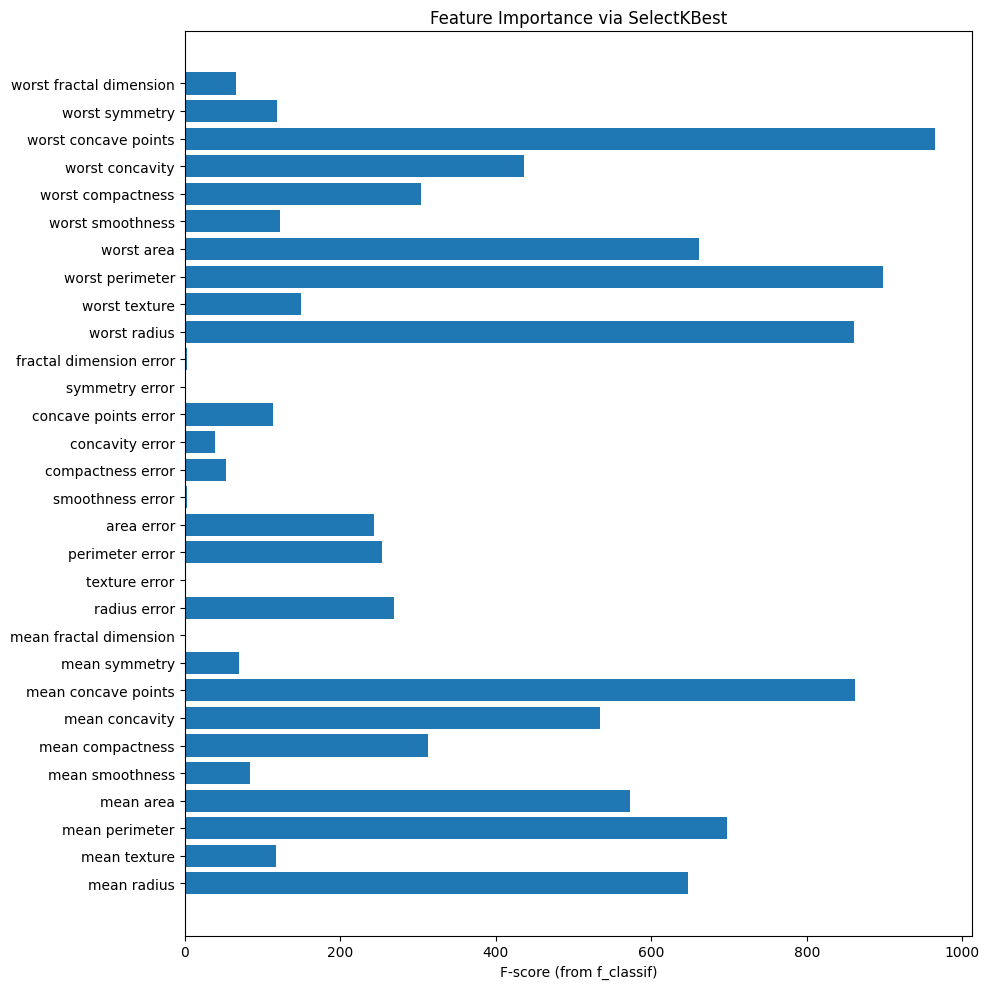

In [6]:
f_scores = selector.scores_
plt.figure(figsize=(10, 10))
plt.barh(X.columns, f_scores)
plt.xlabel("F-score (from f_classif)")
plt.title("Feature Importance via SelectKBest")
plt.tight_layout()
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train
model_all = LogisticRegression(max_iter=1000)
model_all.fit(X_train_scaled, y_train)
y_pred_all = model_all.predict(X_test_scaled)

# Accuracy
acc_all = accuracy_score(y_test, y_pred_all)
print(f"Accuracy with all features: {acc_all:.4f}")

Accuracy with all features: 0.9737


In [9]:
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Scale selected features
scaler_k = StandardScaler()
X_train_k = scaler_k.fit_transform(X_train_selected)
X_test_k = scaler_k.transform(X_test_selected)

# Train
model_k = LogisticRegression(max_iter=1000)
model_k.fit(X_train_k, y_train)
y_pred_k = model_k.predict(X_test_k)

# Accuracy
acc_k = accuracy_score(y_test, y_pred_k)
print(f"Accuracy with top 10 features: {acc_k:.4f}")

Accuracy with top 10 features: 0.9737
